## Loan Prediction
#### Mahua Dwivedi

### Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv(r"C:\mahua\Projects\INTERNSHIPS\CodeClause\Loan Prediction\train.csv")
test=pd.read_csv(r"C:\mahua\Projects\INTERNSHIPS\CodeClause\Loan Prediction\test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Graduated          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    float64
 4   Graduated          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 34.5+ KB


In [5]:
test.head(5)

,Loan_ID,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Yes,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Yes,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Yes,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Yes,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0.0,No,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Yes,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Yes,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Yes,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,No,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Yes,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
dataset=train.append(test)
dataset

,Loan_ID,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Yes,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Yes,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Yes,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,No,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Yes,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3.0,No,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0.0,Yes,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0.0,Yes,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0.0,Yes,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    float64
 4   Graduated          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 107.3+ KB


In [9]:
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Yes,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Yes,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Yes,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,No,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Yes,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Preprocessing

In [10]:
train.status=train.Loan_Status.map({'Y':1,'N':0})
Loan_Status=train.status
train.drop('Loan_Status',axis=1,inplace=True)

In [11]:
Loan_Status

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [12]:
Loan_ID=test.Loan_ID

### Resubstituting values and converting strings to integers

In [13]:
dataset.Gender=dataset.Gender.map({'Male':1,'Female':2})
dataset.Married=dataset.Married.map({'Yes':1,'No':0})
dataset.Loan_Status=dataset.Loan_Status.map({'Y':1,'N':0})
dataset.Self_Employed=dataset.Self_Employed.map({'Yes':1,'No':0})
dataset.Graduated=dataset.Graduated.map({'Yes':1,'No':0})
dataset.Property_Area=dataset.Property_Area.map({'Rural':0,'Semiurban':1,'Urban':2})

In [14]:
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1.0
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0.0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1.0
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1.0
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1.0
5,LP001011,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,2,1.0
6,LP001013,1.0,1.0,0.0,0,0.0,2333,1516.0,95.0,360.0,1.0,2,1.0
7,LP001014,1.0,1.0,3.0,1,0.0,3036,2504.0,158.0,360.0,0.0,1,0.0
8,LP001018,1.0,1.0,2.0,1,0.0,4006,1526.0,168.0,360.0,1.0,2,1.0
9,LP001020,1.0,1.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,1,0.0


### Handling Null values

In [15]:
dataset.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Graduated              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [16]:
dataset.Gender.fillna(np.random.randint(0,2),inplace=True)
dataset.Married.fillna(np.random.randint(0,1),inplace=True)
dataset.Self_Employed.fillna(np.random.randint(0,1),inplace=True)
dataset.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [17]:
dataset.LoanAmount.fillna(dataset.LoanAmount.median(),inplace=True)
dataset.Loan_Amount_Term.fillna(dataset.Loan_Amount_Term.mean(),inplace=True)
dataset.Dependents.fillna(dataset.Dependents.median(),inplace=True)

In [18]:
dataset.drop('Loan_Status',inplace=True,axis=1)

In [19]:
dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Graduated            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### >> No more Null values present

In [20]:
dataset.drop('Loan_ID',inplace=True,axis=1)

In [21]:
dataset.head(5)

,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


### Correlation Matrix

In [22]:
corr=dataset.corr()

<Axes: >

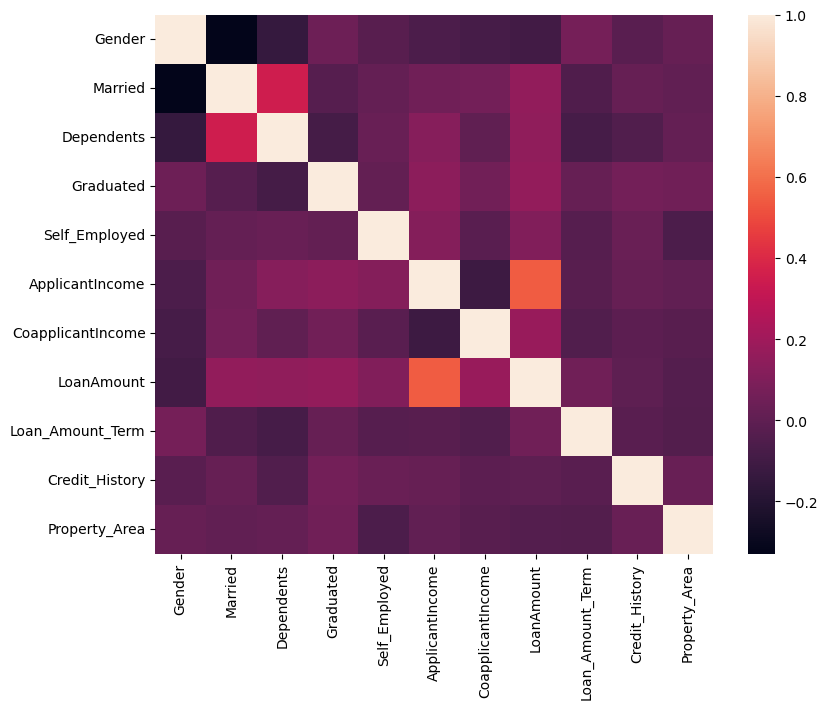

In [23]:
f,ax=plt.subplots(figsize=(9,7))
sns.heatmap(corr)

### Model Building

In [24]:
x_train=dataset.iloc[:614,]
y_train=Loan_Status
testing=dataset.iloc[614:,]
seed=7

In [25]:
y_train.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,random_state=seed)

### Logistic Regression Model

In [27]:
lgm=LogisticRegression()

In [28]:
lgm.fit(x_train,y_train)

LogisticRegression()

In [29]:
lgm_pred = lgm.predict(x_test)

In [30]:
print(classification_report(y_test,lgm_pred))

              precision    recall  f1-score   support

           0       0.92      0.48      0.63        48
           1       0.81      0.98      0.89       106

    accuracy                           0.82       154
   macro avg       0.86      0.73      0.76       154
weighted avg       0.84      0.82      0.81       154



In [31]:
lscore=round(lgm.score(x_train,y_train)*100,2)
print(round(lscore,2,),"%")

80.65 %


### Decision Tree Classifier

In [32]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
dtc_pred=dtc.predict(x_test)

In [34]:
dscore=round(dtc.score(x_train,y_train)*100,2)
print(round(dscore,2,),"%")

100.0 %


### Random Forest Classifier

In [35]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
rfc_pred=rfc.predict(x_test)

In [37]:
rscore=round(rfc.score(x_train,y_train)*100,2)
print(round(rscore,2,),"%")

100.0 %


### Accuracy of model

In [38]:
classifiers=[]
classifiers.append(rscore)
classifiers.append(dscore)
classifiers.append(lscore)
label=['RFC','DTC','LGM']

Text(0.5, 1.0, 'Accuracy')

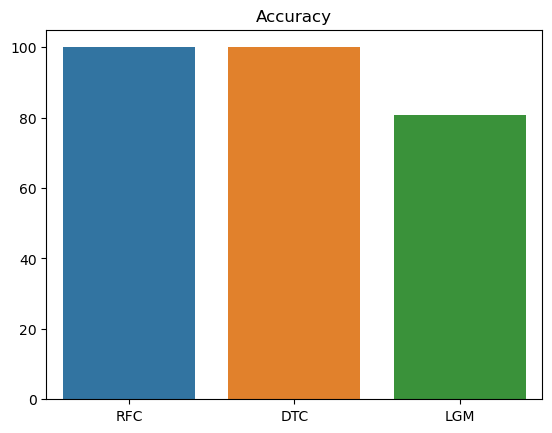

In [39]:
sns.barplot(x=label,y=classifiers)
plt.title('Accuracy')

#### >> Random Forest had highest accuracy hence we'll predict the Loan_Status of customers using it.

In [40]:
df_op=pd.DataFrame()
df_op

""


In [41]:
op=rfc.predict(testing).astype(int)
op

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [42]:
df_op['Loan_ID']=Loan_ID

In [43]:
df_op['Loan_Status']=op

In [44]:
df_op['Loan_Status'].value_counts()

1    291
0     76
Name: Loan_Status, dtype: int64

In [45]:
df_op.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
